# HR Analytics Project- Understanding the Attrition in HR

Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?


HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.


Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers


<b>Note: You can find the dataset in the link below.

Downlaod Files:</b>

https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
# Import IBM HR dataset Csv file 
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
print('#Rows, #Columns:',df.shape)
df.head()

#Rows, #Columns: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print(df.columns)

df.info()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition      

In [4]:
# sort 35 Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

#### Comment :
- HR dataset has 1470 rows and 35 columns.
- Non-null count is same for all Columns, so it seem that it contain No missing value. Still we need to perform Data integrity Check for null values in form of "-","NA" , any duplicate entry or error in Data.
- Out of 35 we have 9 features==> Object datatypes and rest ==> int64 types
-  Numeric Variables 'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' are ordinal variable. 
-Unique range of all these ordinal Variable need to check.
- Target Variable==> 'Attrition'.

# Statistical Analysis

### Data Integrity Check

In [5]:
df.duplicated().sum()  # check the duplicate data for all columns.

0

### Missing value check 

In [6]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                          Missing Values  % Missing data
Age                                    0             0.0
StandardHours                          0             0.0
NumCompaniesWorked                     0             0.0
Over18                                 0             0.0
OverTime                               0             0.0
PercentSalaryHike                      0             0.0
PerformanceRating                      0             0.0
RelationshipSatisfaction               0             0.0
StockOptionLevel                       0             0.0
MonthlyIncome                          0             0.0
TotalWorkingYears                      0             0.0
TrainingTimesLastYear                  0             0.0
WorkLifeBalance                        0             0.0
YearsAtCompany                         0             0.0
YearsInCurrentRole                     0             0.0
YearsSinceLastPromotion                0             0.0
MonthlyRate                    

 #### Observation:
 No missing data! for  the dataset.
     
Dataset doesnot contain Any duplicate entry. 
     
<b>No missing data! !!!</b>

### Statistical Matrix

<AxesSubplot: >

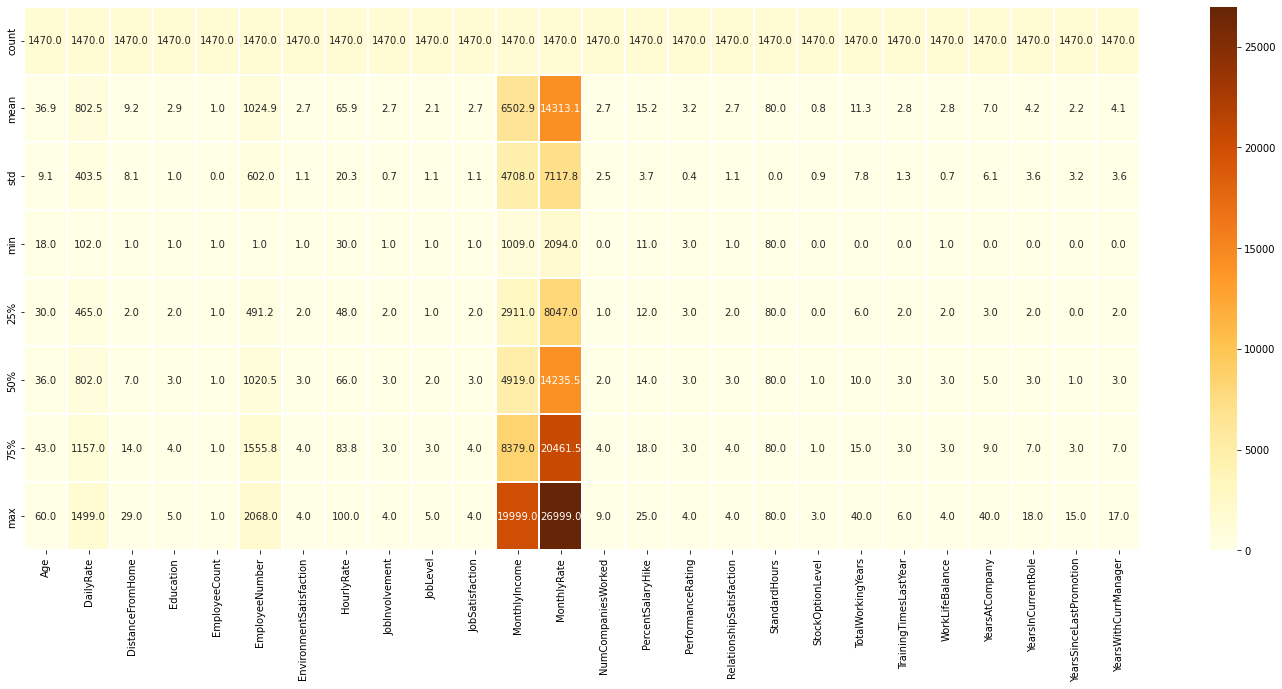

In [7]:
# Visualizing the statistics using heatmap.
plt.figure(figsize=(25,10))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='YlOrBr')

In [8]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Observation :
- Minimum Empolyee Age is 18 and Maximum age of employee 60.
- Average distance from home is 9.1 KM. It means that most of employee travel atleast 18 KM in day from home to office.
- On Average performance Rating of employees is 3.163 with min value 3.0. This Means that performance of most of employee is 'Good'.<b>This implies that Attrition of Employee with 'Outstanding' or 5 rating need to investigate.</b>

- 50% of Employees has <u> worked atleast 2 companies</u> previously.
- For Monthly Income,Monthly Rate by looking at 50% and max column we can say outliers exist in this feature.
- By looking at Mean and Median we see that some of the features are skew in nature.
- StandardHours and EmployeeCount contain same value for all stastical parameter. It means they contain one unique value.

- <b> Lets do some Statistical Analysis. Start with target Variable. </b>

No     1233
Yes     237
Name: Attrition, dtype: int64


<AxesSubplot: xlabel='Attrition', ylabel='count'>

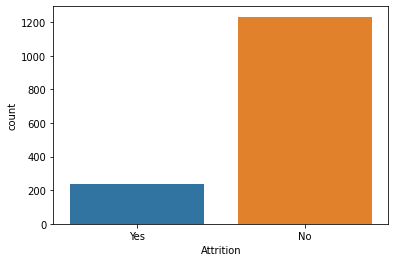

In [9]:
print(df['Attrition'].value_counts())
sns.countplot(x=df['Attrition'])

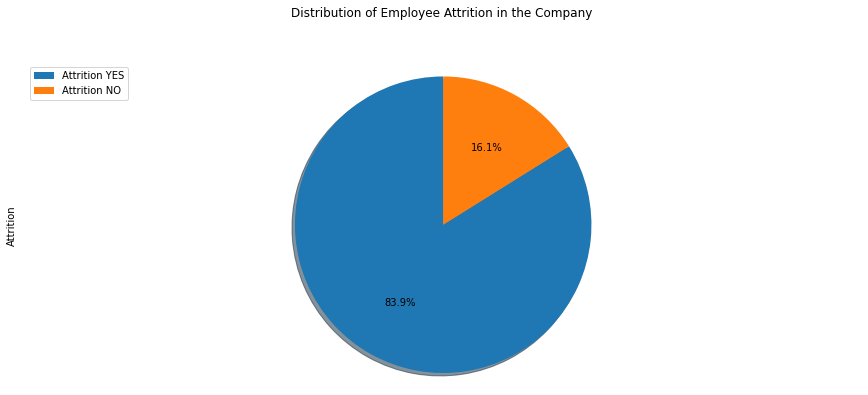

In [10]:
labels = 'Attrition YES','Attrition NO'
df['Attrition'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Employee Attrition in the Company ', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper left') 
 # show plot
plt.show()

#### Observation:

83.88% (1237 employees) Employees did not leave the organization while 16.12% (237 employees) did leave the organization <b><em> making our dataset to be considered imbalanced </em></b> since more people stay in the organization than they actually leave.

We will Enlisting Value counts & Sub-categories of different categorial features available

In [11]:
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("##"*20)
    

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
########################################
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
########################################
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
########################################
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
########################################
Gender
Male      882
Female    588
Name: Gender, dtype: int64
########################################
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Rep

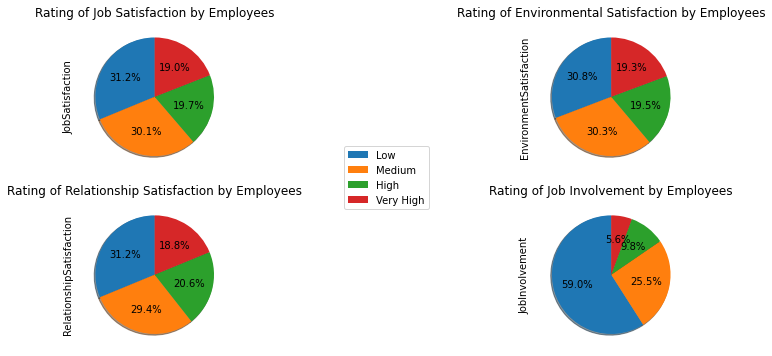

In [12]:
fig = plt.figure() 

ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)  

labels = 'Low','Medium','High','Very High'

df['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

df['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

df['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

df['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

## From the subplot, we can infer that more than 60% of the employees are :

    Not Satisfied in their Job
    Not Satisfied with their Work Environmnet
    Not Satisfied in their Relationship
    Not Getting involved in their job

#### Enlisting Value counts & Sub-categories of different Ordinal features available

In [13]:
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    print(i)
    print(df[i].value_counts())
    print("**"*20)

Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
****************************************
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
****************************************
JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64
****************************************
JobSatisfaction
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64
****************************************
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64
****************************************
PerformanceRating
3    1244
4     226
Name: PerformanceRating, dtype: int64
****************************************
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64
****************************************


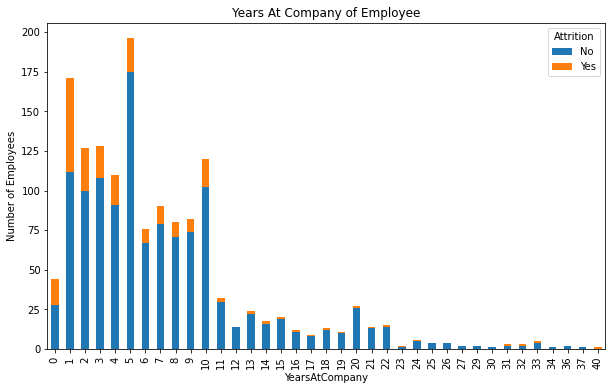

In [14]:
yac = df.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()

It is observed that the newly arriving employees quit their jobs most,
so more concern should be given to the freshers and their cause of leaving the company should be figured out

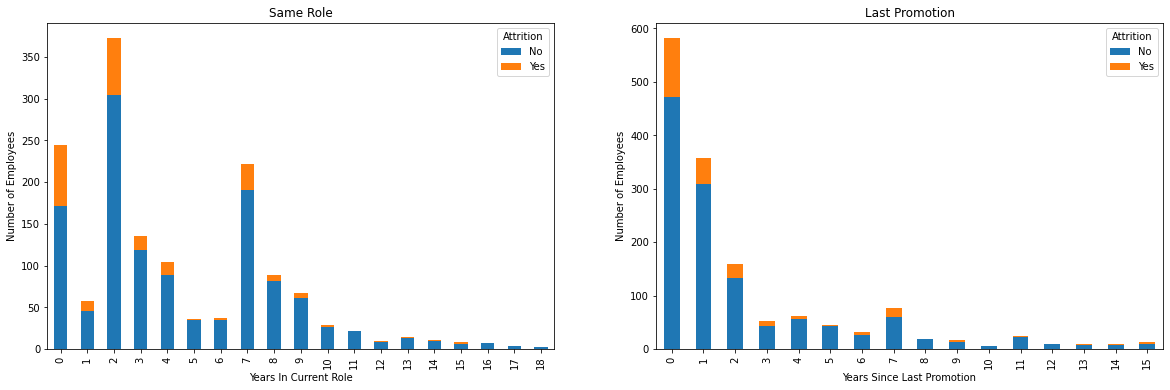

In [15]:
ycr = df.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()
ysp = df.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()


fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Box plot
ycr.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax0) # add to subplot 1
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')

# Subplot 2: Line plot
ysp.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax1) # add to subplot 2
ax1.set_title ('Last Promotion')
ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Years Since Last Promotion')

plt.show()

**From the above two plots, it is very clear that Employees who are in same post or not getting promoted tend to leave the company most. 
It is a major concern, since experienced Employees quiting their jobs would affect the company most**

#### Education level of Man power available

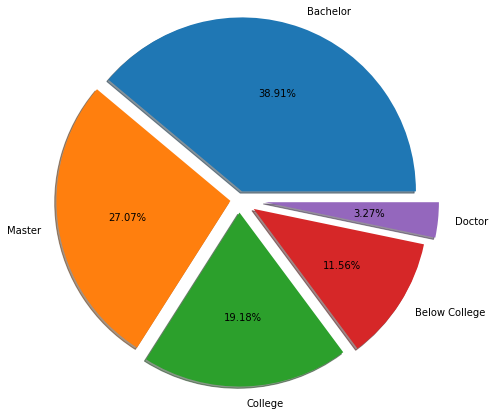

In [16]:
labels='Bachelor','Master','College','Below College','Doctor'
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(),labels = labels,radius =2,autopct = '%3.2f%%',explode=[0.1,0.1,0.15,0.2,0.3], shadow=True,)
plt.show()

#### Comment:
- More than 60 % employees educated at Masters & Bachelor. It interesting to find out in which department need this human resources.
- 30 % of Employees are highly educated which involves master and doctor degree.
- 39 % of Employees are graduate. 
- Almost 19% Employees are educated upto college & 12% are below college.
    
#### Lets try to gain insight on to which department this Human Resource belong and education need of each department through visualization.

In [17]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

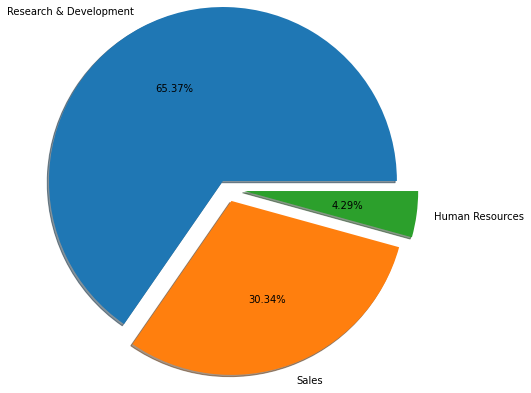

In [18]:
labels ='Research & Development','Sales','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['Department'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.15,0.2],shadow=True)
plt.show()

In [19]:
pd.crosstab([df.Education],[df.Department], margins=True).style.background_gradient(cmap='Blues')

Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


 #### Comment :
- 65.37% of Employees belong to Research & Development Department. Out of Total 961 Employee no of employee educated at Bachelors,Masters, Doctor are 379,255 and 30 respectively.
- Only 63 Employee work in HR department.


In [20]:
pd.crosstab([df.Education],[df.Department,df.Attrition], margins=True).style.background_gradient(cmap='YlOrBr')

#### Employee distribution as per education field and level of education

In [21]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [22]:
# Let check distribution of department Vs education Field
pd.crosstab([df.Department],[df.EducationField], margins=True).style.background_gradient(cmap='Blues')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


#### Comment:
- 41.22 % Employee comes from Life science background followed by Medical profession with 31.56%.
- There are only 27 people with HR background and We know that 63 people work in HR Department from previous result. This implies that <b> atleast half employee working in HR department do not have HR background.</b> This important as there is <u>more probability of Employees Retention</u> is when they are working in domain of interest or as per their education background.<b> Dissatisfaction with want we doing can be seen as major reason of leaving job.</b>
- Most of Employees with Techanical degree are Bachelors.
- Most of Employees having Masters and Doctors belong to Life Science and Medical domain.
- R&D department almost everyone comes from profession or technical background except support staff.<b> Factor like Salary Hike, travelling, overtime and Job level are things need to taken in consideration while analysing Attrition of this category.</b>
- There are 159 Employee with <u>Marketing background and all work in Sales Department.</u>
- 50% Employees in sales department have background of Life sciences & Medical.<b> So it will interesting to see attrition rate in these employees.</b>

<b> We will Analysis Attrition over above insight in next section of Job role.</b>

#### Lets work with Job Role

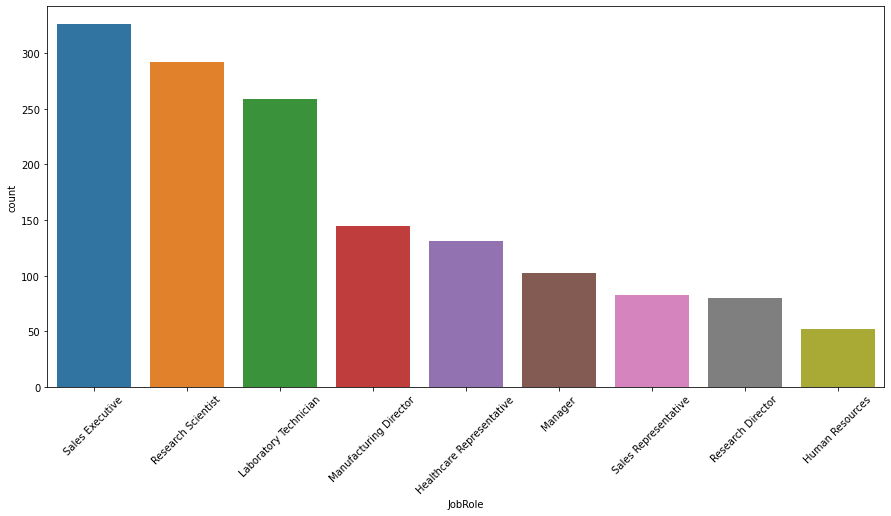

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['JobRole'])
plt.xticks(rotation=45)
plt.show()

- <b>Before going for Attrition by Job role,</b> 

first build matrix of department vs job role which will give us idea about number of employees of different job role across department

In [24]:
pd.crosstab([df.JobRole],[df.Department], margins=True).style.background_gradient(cmap='Blues')

Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


 #### Comment:
- There are 3 job role in HR Department, maximum of which are sales Executive with 446 Total Employees.
- Human Resources department has 2 Job role i.e. HR & Manager.
- There 6 different Job role in R&D department with total 961 employees and until now we know that all of them belong to thier respective domain background.

<Figure size 864x720 with 0 Axes>

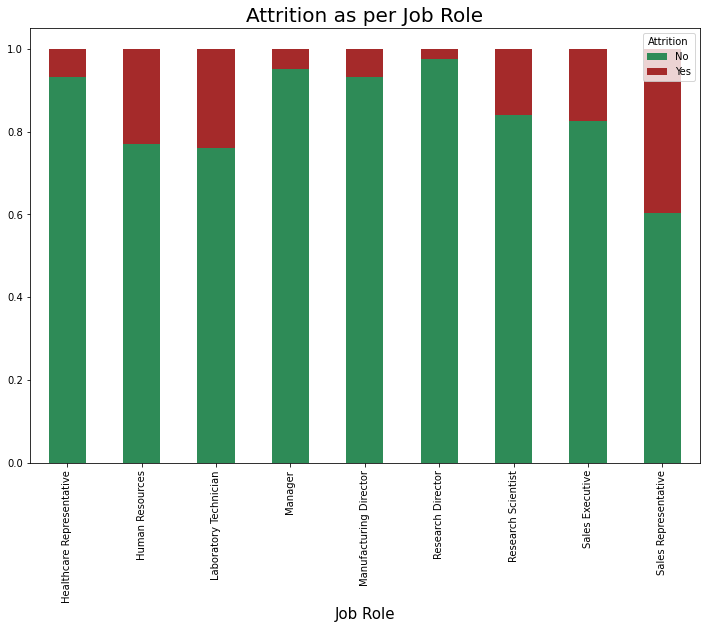

In [25]:
plt.figure(figsize=(12,10))
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, 
                    color=['seagreen', 'brown'],figsize=(12,8))
plt.title('Attrition as per Job Role', fontsize=20)
plt.xlabel('Job Role',fontsize=15)
plt.show()

<b> We all can definitely see Red Signal for different Managers & HR of Respective Job Role in above barplot !!! </b> 

Bar plot showing % attrition across each job role, let check absolute number matrix of attrition, again this time using crosstab.

In [26]:
pd.crosstab([df.JobRole,df.Department],[df.Attrition], margins=True).style.background_gradient(cmap='vlag')
                                                                                               

#### Comment:
- Percentage of attrition is high in Sales Representative,Laboratory Technician,Human Resources. This all job role comes at bottom in corparate hierachy also Salary is comparatively less compare to other job role.
- Monthly Income, Job stastifation, travelling are feature need to dive into for further insights in these job role.
- At the Top chart 62 Laboratory Technician has resign from job, followed by 57 sales executive and 47 Research Scientist.
- 16 % arttrition rate for Research Scientist, which involve huge investment from company. Company not only loses employee but its knowledge base, expertise & Intellatual property rights in some cases. 
   

In [27]:
# Grouping Numeric Features
Numeric=['Age', 'DailyRate', 'DistanceFromHome',  
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

#### plot of Numeric Variables

In [28]:
# Grouping Numeric Features
Numeric_int=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

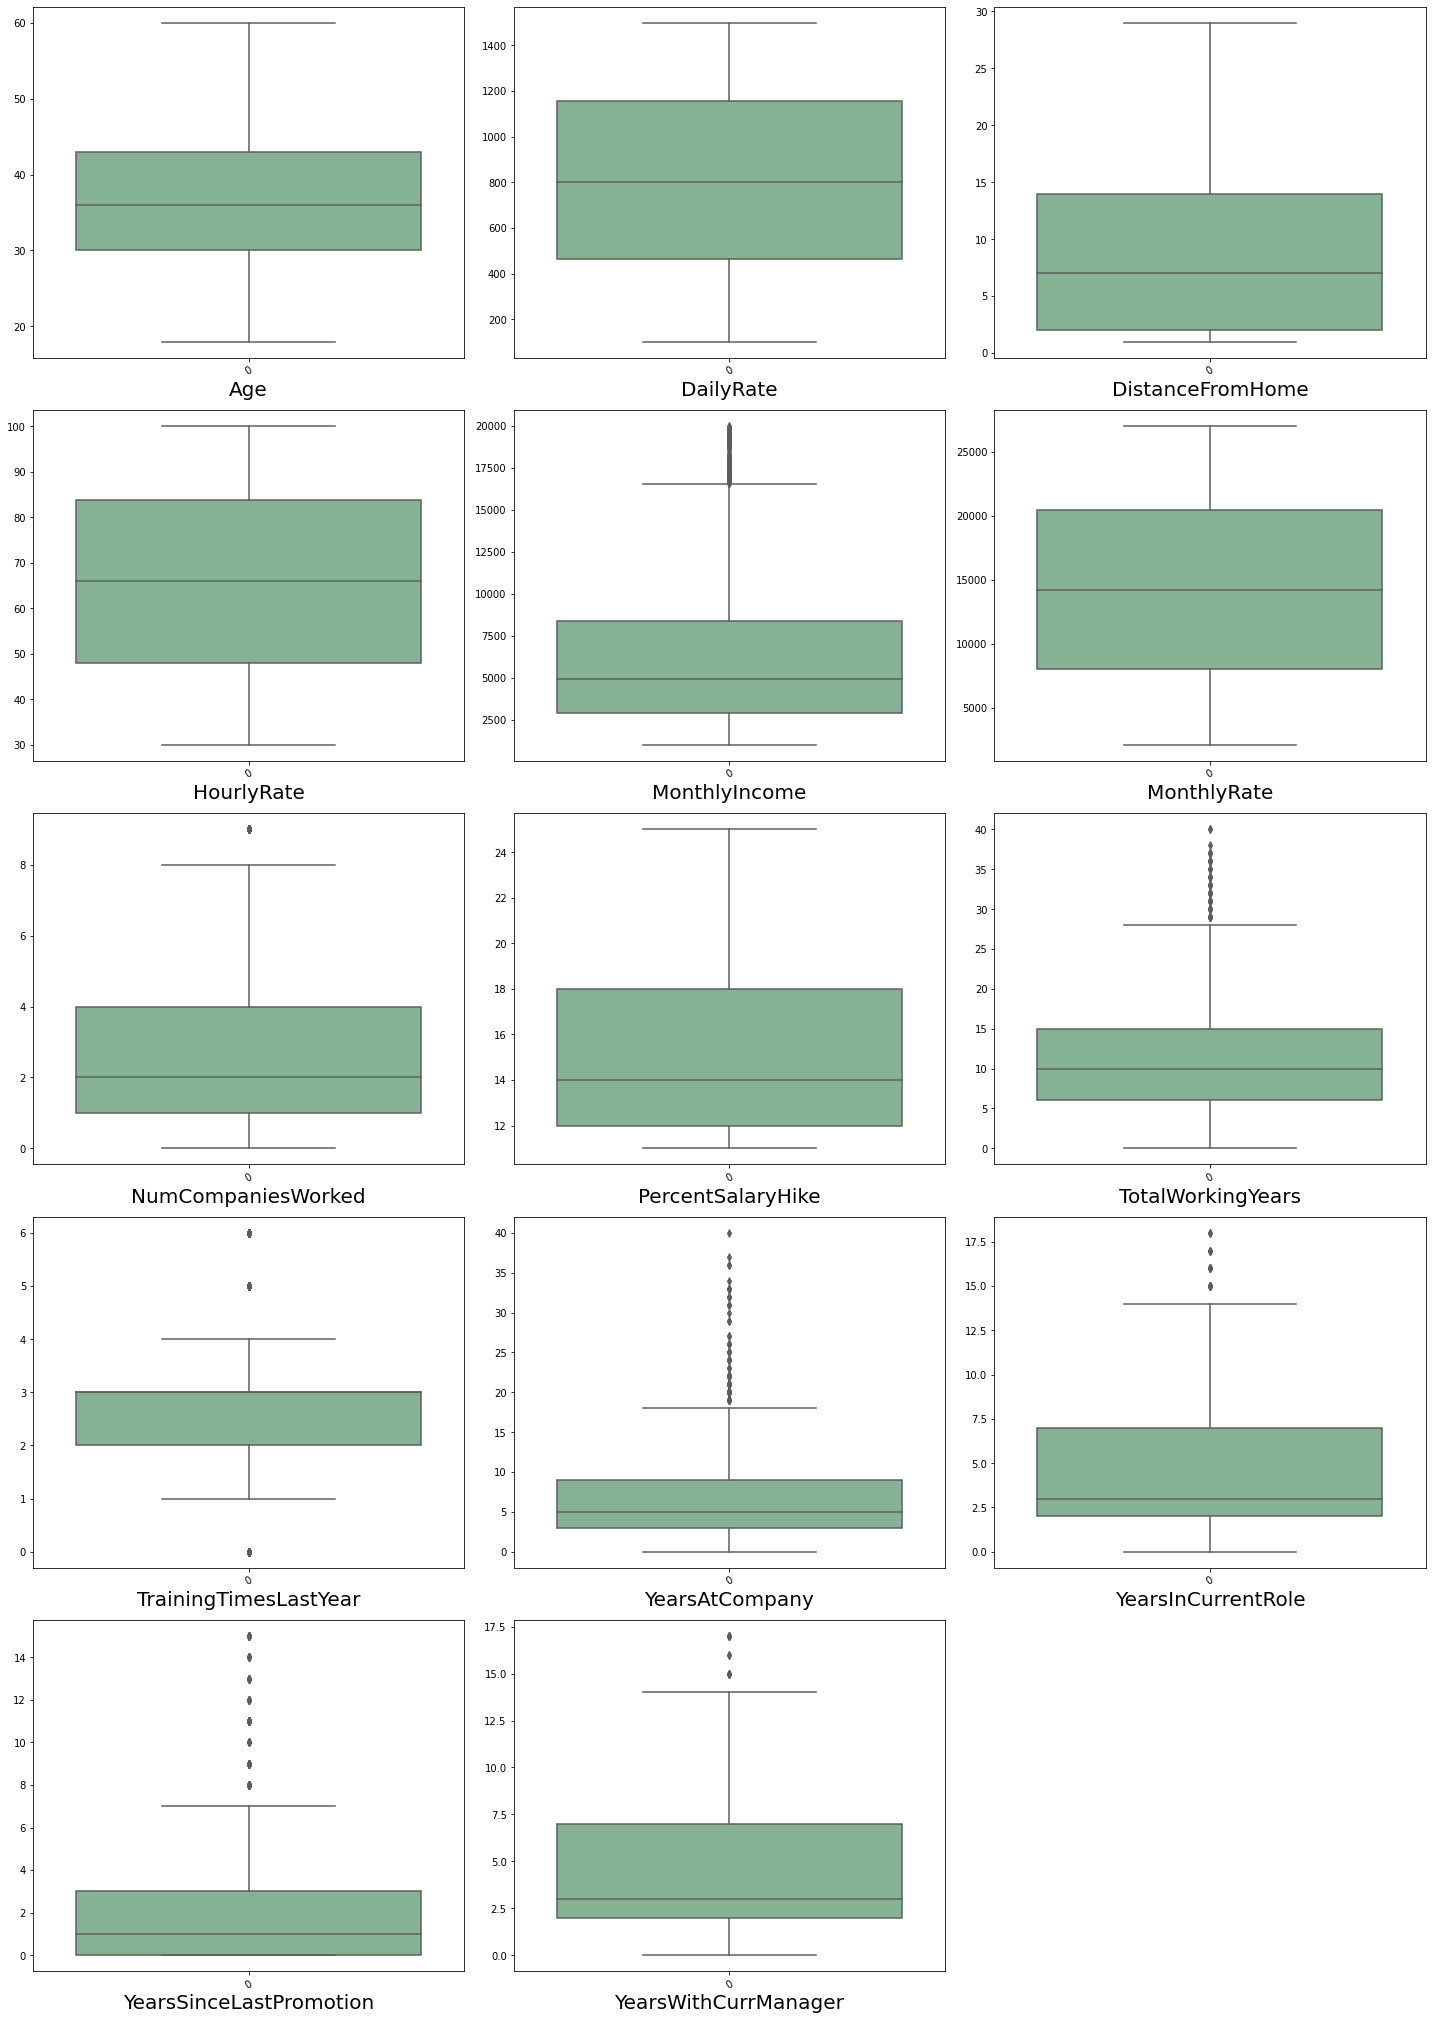

In [29]:
sns.set_palette('crest')
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1

for i in Numeric_int:
    if plotnumber <=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### Comment:
- For Majority of people have spend 3 to 10 years at company.
- Most of people staying company upto 2 years after promotion.
- Majority of people are are train 2-3 times in last year.If employees leaves job then it loss investment for company.
- Majority of people stay in same role for maximum 4 yrs.
- Majority of Employees have salary hike of 10 to 15%.

#### Age Vs Attrition

<AxesSubplot: xlabel='Age', ylabel='count'>

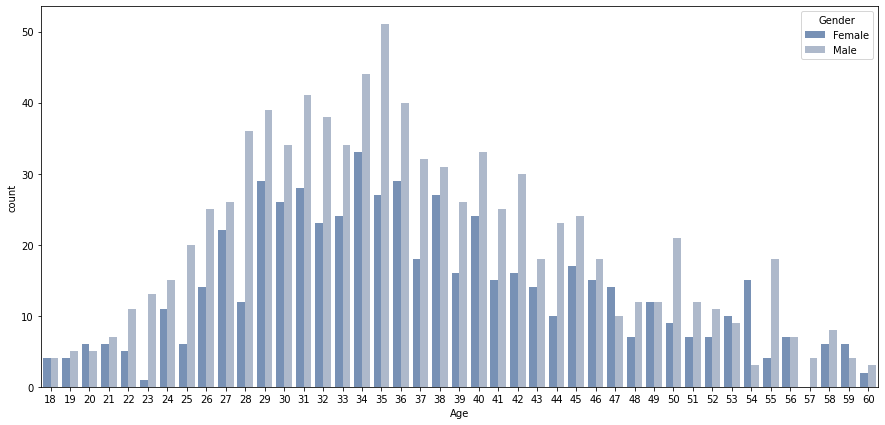

In [30]:
sns.set_palette('vlag')
plt.figure(figsize=(15,7), facecolor='white')
sns.countplot(x='Age', hue='Gender', data=df)

<AxesSubplot: xlabel='Age', ylabel='count'>

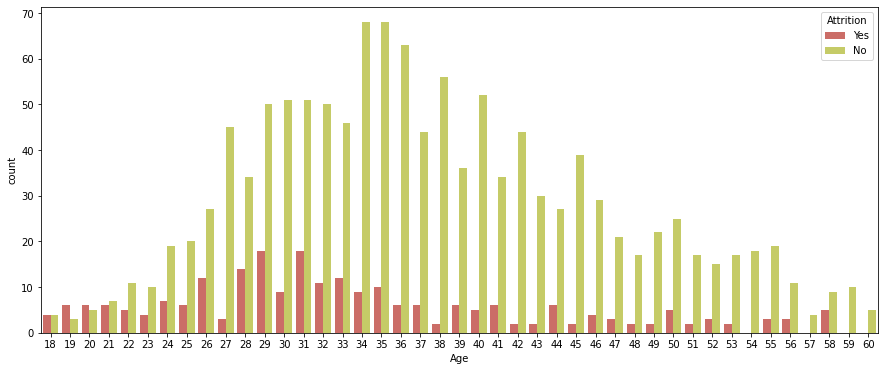

In [31]:
sns.set_palette('hls')
plt.subplots(figsize=(15,6))
sns.countplot(x='Age', hue='Attrition', data=df)

#### Comment:
1. The Attrition rate is minimum between the Age years of 34 and 35.   
2. The Attrition rate is maximum between the Age years of 29 and 31.

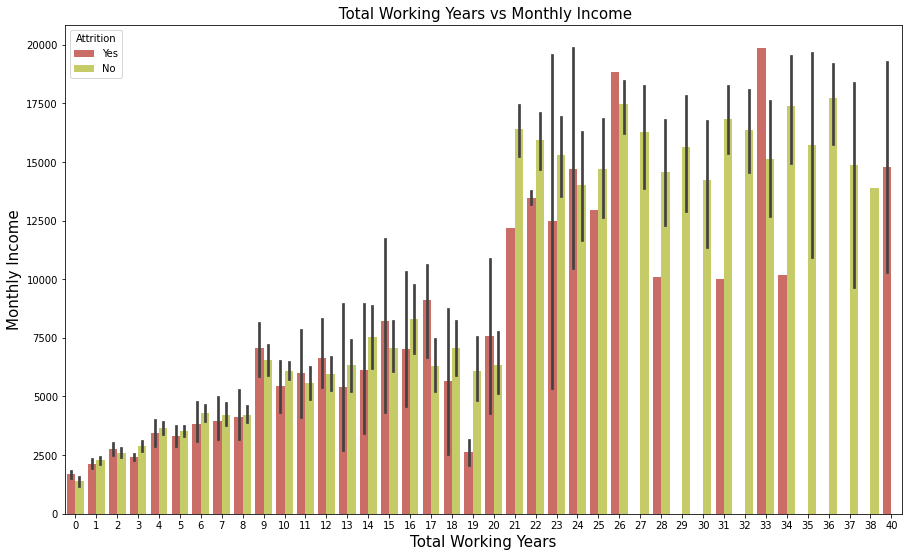

In [32]:
plt.figure(figsize=(15,9))
sns.barplot(data=df,x=df['TotalWorkingYears'],y=df['MonthlyIncome'],hue=df['Attrition'])
plt.xlabel('Total Working Years',fontsize=15)
plt.ylabel('Monthly Income',fontsize=15)
plt.title(" Total Working Years vs Monthly Income", fontsize=15)
plt.show()

#### Observation:
   Monthly Income is highest for the employees with 21 or more number of Total Working Years.
   
   Also, Attrition rate is more for less than 26 Years

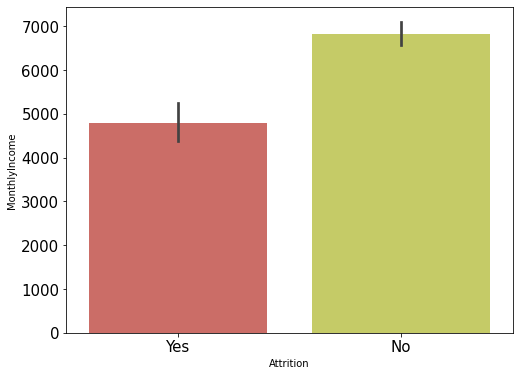

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Comment:
The Attrition rate in the employees is less when the monthly income reaches to 6900.

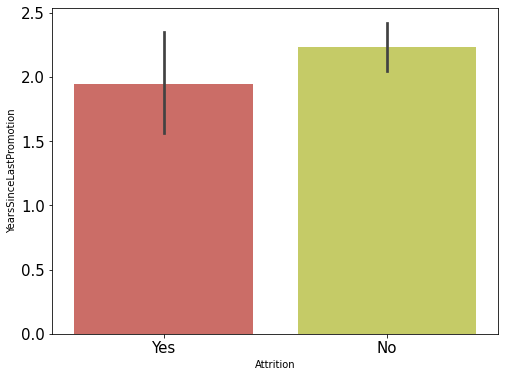

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='YearsSinceLastPromotion',data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Comment:
The rate of Attrition is high when the employee did not got promoted since 1.8 years.

In [35]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Encoding categorical data

In [36]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [37]:
# Droping unnecessary columns
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [38]:
df.shape

(1470, 31)

In [39]:
# Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df=ordinal_encode(df, oe_col)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


# Outliers Detection and Removal

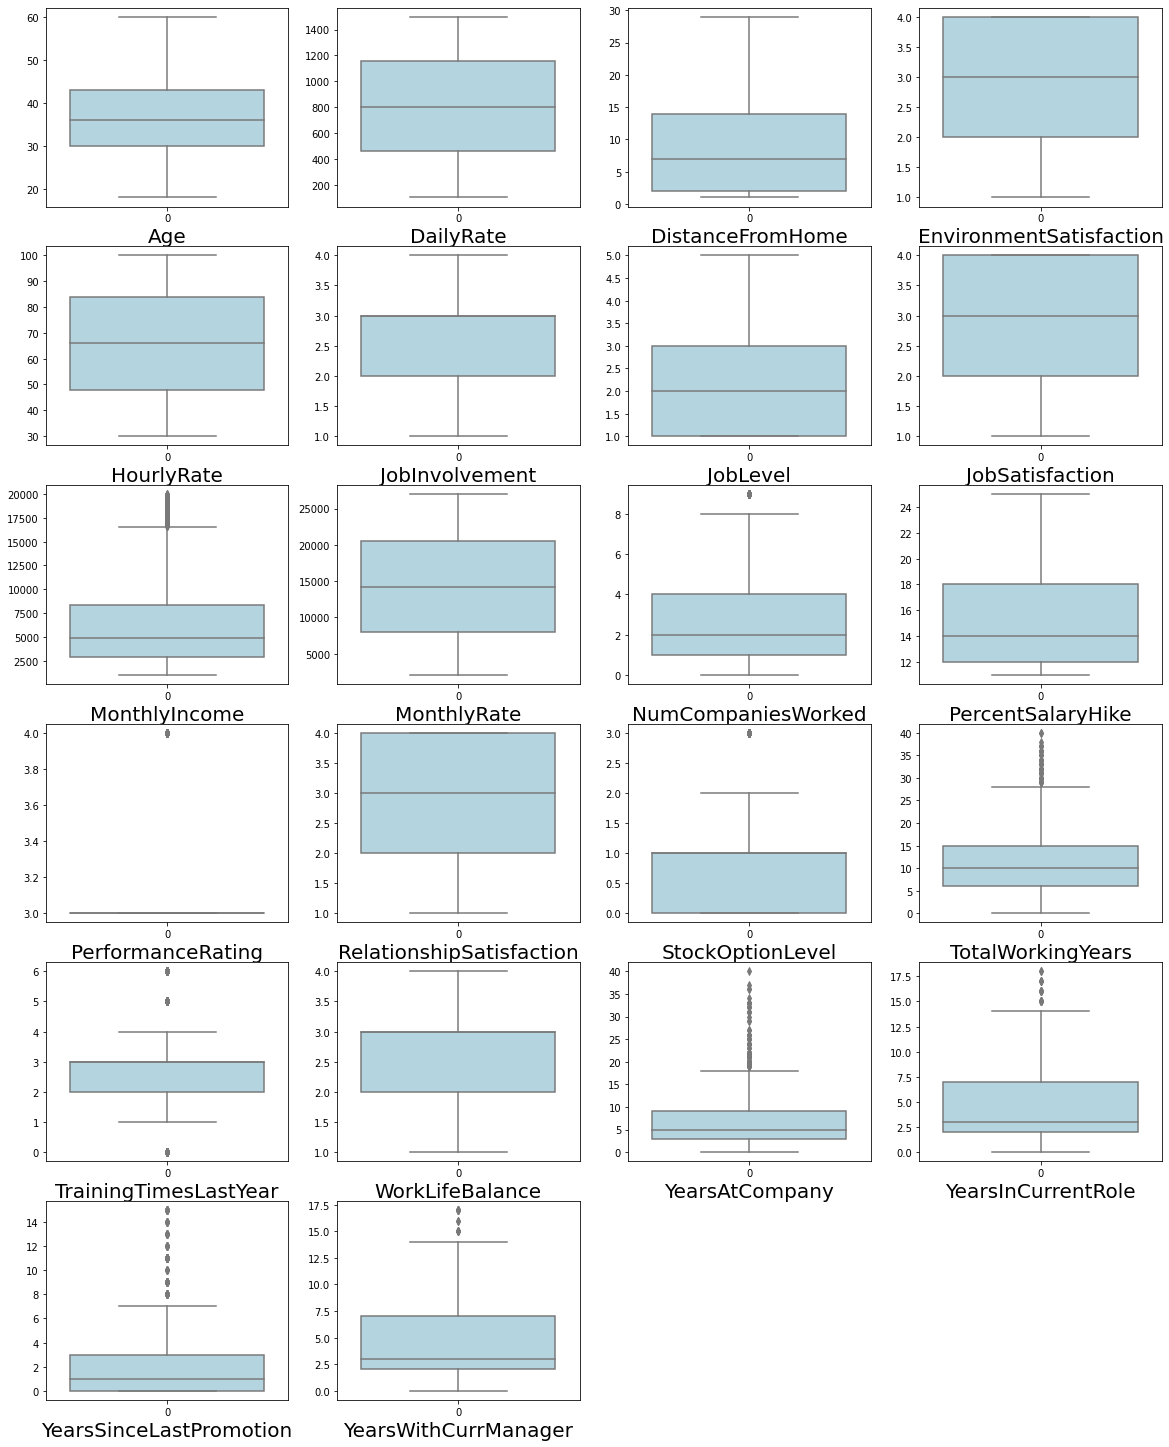

In [40]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numeric:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column],color='lightblue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Features containing outliers
"MonthlyIncome", "NumCompaniesWorked", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition". 

In [41]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)



Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


##### Data Loss

In [42]:

# Data loss calculation with z-score method
loss_percent_zscore=round((df.shape[0]-df1.shape[0])/df.shape[0]*100,5)
loss_percent_zscore
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",loss_percent_zscore,'%')

Percentage Data Loss : 5.64626 %


**Dataloss in zscore method after removing outliers of 5.64626% which is less than 10%**

In [43]:
df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

# Feature selection and Engineering

## 1. Skewness of features

In [44]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [45]:
# Splitting data in target and dependent feature
X = df.drop(['Attrition'], axis =1)
Y = df['Attrition']

#### Transforming  skew data using power transform

In [46]:
from sklearn.preprocessing import power_transform
df = power_transform(X)
df = pd.DataFrame(df, columns=X.columns)
df.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

#### Comment :
- For Numeric features skewness is transform within permissible limit.
- For ordinal features & categorical features skew parameter irrevalent.

### 2. Corrleation 

In [47]:
df.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.019607,0.019864,-0.036344,-0.025855,0.215520,-0.037564,0.013967,-0.037163,0.026203,...,-0.002365,0.037296,0.089449,0.652405,-0.014951,-0.016180,0.207538,0.145404,0.114162,0.142446
BusinessTravel,0.019607,1.000000,-0.001984,-0.003560,-0.007041,-0.006468,0.034658,0.004183,-0.011439,0.026364,...,-0.021061,-0.036165,-0.006092,0.027298,0.006192,-0.017977,-0.024021,-0.035610,-0.033148,-0.032665
DailyRate,0.019864,-0.001984,1.000000,-0.003546,-0.006034,-0.017504,0.040993,0.034324,-0.003271,0.015156,...,0.000687,0.005771,0.049415,0.042750,0.005118,-0.046550,0.005391,0.022143,-0.035448,0.005908
Department,-0.036344,-0.003560,-0.003546,1.000000,0.037834,0.012780,0.082525,-0.013867,-0.030950,-0.000623,...,-0.038429,-0.037572,-0.000630,-0.006833,0.039938,0.017807,0.025457,0.057817,0.017699,0.024241
DistanceFromHome,-0.025855,-0.007041,-0.006034,0.037834,1.000000,0.002714,0.021074,-0.013409,0.010557,0.015607,...,0.013212,0.009379,0.027082,-0.012129,-0.015334,-0.030011,0.006570,0.013091,-0.003873,-0.002310
Education,0.215520,-0.006468,-0.017504,0.012780,0.002714,1.000000,-0.038405,-0.026095,-0.017807,0.011105,...,-0.023157,-0.004863,0.025621,0.150720,-0.023039,0.010164,0.037921,0.051072,0.016076,0.026651
EducationField,-0.037564,0.034658,0.040993,0.082525,0.021074,-0.038405,1.000000,0.042609,0.005059,-0.004372,...,-0.001393,-0.018254,-0.012936,-0.001827,0.054321,0.034788,0.004483,0.004372,0.023062,0.028189
EnvironmentSatisfaction,0.013967,0.004183,0.034324,-0.013867,-0.013409,-0.026095,0.042609,1.000000,-0.014940,-0.042512,...,-0.024853,0.016892,0.024345,-0.013356,-0.018350,0.030422,0.012338,0.029218,0.038031,0.006417
Gender,-0.037163,-0.011439,-0.003271,-0.030950,0.010557,-0.017807,0.005059,-0.014940,1.000000,0.005618,...,-0.010757,0.041439,0.024390,-0.049776,-0.039213,0.002726,-0.046018,-0.028101,-0.016131,-0.027972
HourlyRate,0.026203,0.026364,0.015156,-0.000623,0.015607,0.011105,-0.004372,-0.042512,0.005618,1.000000,...,-0.006571,0.005207,0.041329,-0.012902,-0.018396,-0.013811,-0.032827,-0.035899,-0.062271,-0.022931


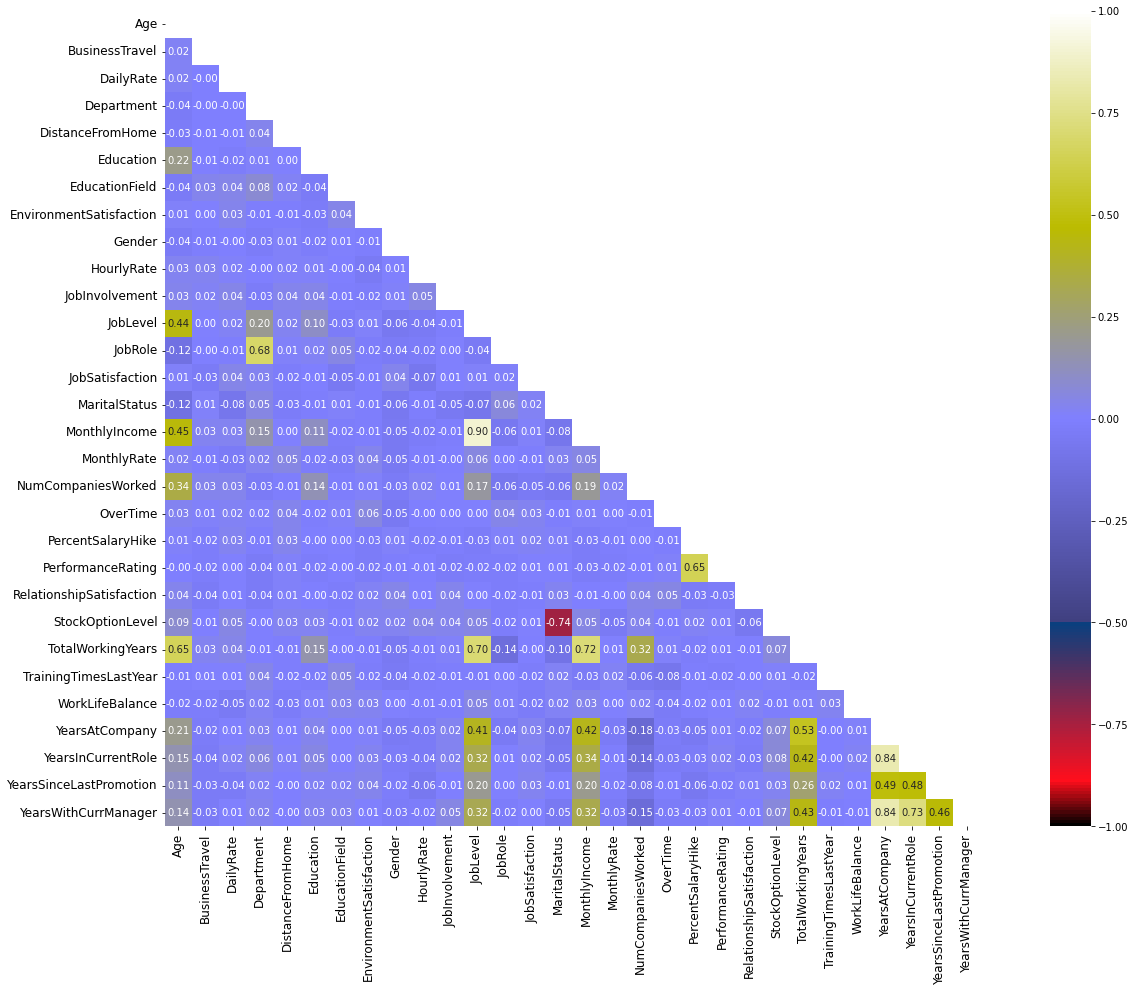

In [48]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

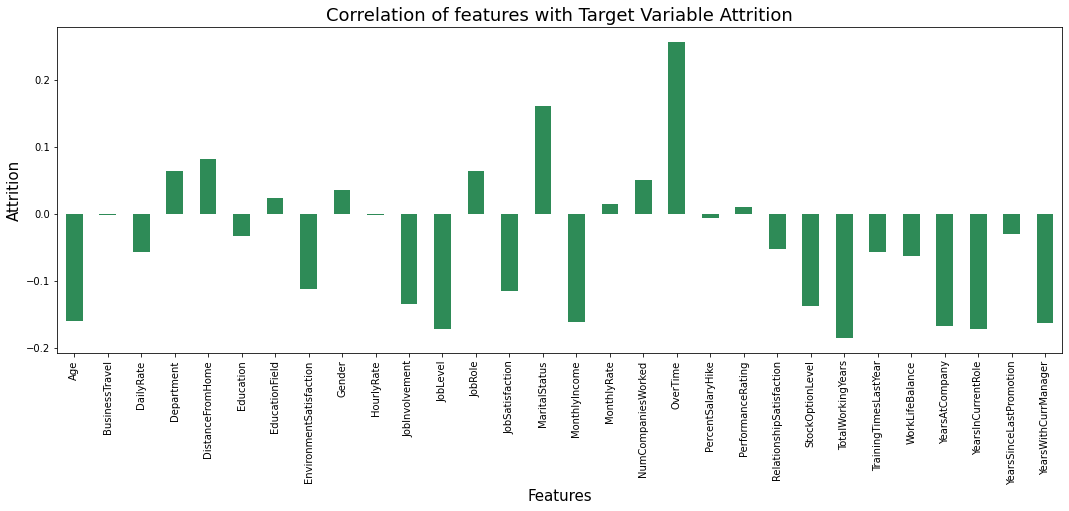

In [49]:
plt.figure(figsize = (18,6))
df1.corr()['Attrition'].drop(['Attrition']).plot(kind='bar',color = 'seagreen')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation of features with Target Variable Attrition',fontsize = 18)
plt.show()

#### Comment:
- Age, JobLevel, MonthlyIncome is highly positively correlated with TotalWorkingYears.
- JobLevel is highly positively correlated with the MonthlyIncome.
- PercentSalaryHike is highly positively correlated with the column PerformanceRating.

### 3. Checking Multicollinearity between features using variance_inflation_factor

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,1.930457,Age
1,1.014314,BusinessTravel
2,1.025841,DailyRate
3,2.172093,Department
4,1.017385,DistanceFromHome
5,1.065266,Education
6,1.030480,EducationField
7,1.024396,EnvironmentSatisfaction
8,1.024366,Gender
9,1.024189,HourlyRate


#### Comment :
- We can see that multicollinerity is within permissible limit of 10.

### Balancing using SMOTE

<b> As data is Imbalanced in nature we will need to balance target variable.</b>

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [53]:
Y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

## Standard Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

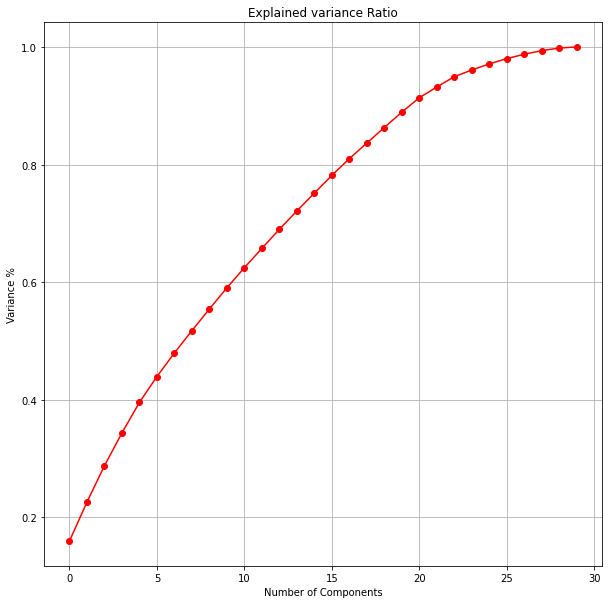

In [55]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Comment -
<b> AS per the graph, we can see that 21 principal components attribute for 90% of variation in the data.  We shall pick the first 21 components for our prediction </b>

In [56]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(X_scale)

In [57]:
principle_x=pd.DataFrame(x_new,columns=np.arange(21))

# Machine Learning Model Building

In [58]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,f1_score

lr=LogisticRegression()  # Defining instance for logisticregression

# Finding the best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(principle_x, Y, random_state=i, test_size=.2)    
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append(abs((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Table of random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Table of random state values with training accuracy = testing accuracy


,Random State,Training Accuracy,Testing Accuracy,Difference
9,456,84.719222,84.698276,0.020947
14,760,84.935205,84.913793,0.021412
11,712,84.935205,84.913793,0.021412
10,608,84.935205,84.913793,0.021412
7,338,85.583153,85.560345,0.022809
15,780,85.313175,85.344828,0.031653
3,222,85.313175,85.344828,0.031653
0,13,85.097192,85.129310,0.032118
13,756,85.097192,85.129310,0.032118
12,748,85.097192,85.129310,0.032118


Observations:

From the above table, as multple random states give same training and testing accuarcy scores, taking one of this from the below code

In [59]:
# Getting the best random state where training accuracy equal to testing accuracy
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
BRS=np.array(RSN)[0]
BRS

456

In [60]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(principle_x, Y,test_size=0.2,random_state=BRS)

In [61]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))

0.8469827586206896


In [62]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       225
           1       0.87      0.83      0.85       239

    accuracy                           0.85       464
   macro avg       0.85      0.85      0.85       464
weighted avg       0.85      0.85      0.85       464



In [63]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[195  30]
 [ 41 198]]


# Cross Validation for Logistic Regression

In [64]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,principle_x, Y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation table


,No of Folds,Cross Validation Score,Model Score,Difference
6,8,84.631607,84.698276,0.000667
5,7,84.500464,84.698276,0.001978
7,9,84.461604,84.698276,0.002367
8,10,84.457941,84.698276,0.002403
4,6,84.412781,84.698276,0.002855
2,4,84.326425,84.698276,0.003719
3,5,84.072391,84.698276,0.006259
0,2,83.981002,84.698276,0.007173
1,3,83.851468,84.698276,0.008468


Observations:

Getting the no. folds where the delta is least between cross validation and model scores from the below code. In this case, selected CV=8 from the above table

In [65]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
BCV

8

In [66]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,principle_x, Y,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 84.63160720677723 
The accuracy score is: 84.69827586206897
Difference is: 0.0006666865529172394


# Other Classification Algorithms

In [67]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier
from sklearn.ensemble import VotingClassifier            # VotingClassifier


# Defining Voting Classifier Models
estimator=[]
estimator.append(('KNC',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),
        ('VotingClassifier()',VotingClassifier(estimators=estimator,voting="soft"))]

# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[lss-lsscore_selected]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Appending "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # Printing "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],principle_x, Y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sorting the score table using the difference

Model: GaussianNB()
Accuracy Score:
83.40517241379311
Confusion Matrix:
[[189  36]
 [ 41 198]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       225
           1       0.85      0.83      0.84       239

    accuracy                           0.83       464
   macro avg       0.83      0.83      0.83       464
weighted avg       0.83      0.83      0.83       464

------------------------------------------------------------
Model: Decision Tree Classifier()
Accuracy Score:
80.17241379310344
Confusion Matrix:
[[178  47]
 [ 45 194]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       225
           1       0.80      0.81      0.81       239

    accuracy                           0.80       464
   macro avg       0.80      0.80      0.80       464
weighted avg       0.80      0.80      0.80       464

-----------------------------------

,Model,Model Score,Cross Validation Score,Difference
2,Decision Tree Classifier(),80.172414,80.143330,0.000291
0,LogisticRegression(),84.698276,84.631607,0.000667
1,GaussianNB(),83.405172,83.513602,0.001084
8,GradientBoostingClassifier(),88.146552,87.872867,0.002737
11,VotingClassifier(),89.870690,89.553902,0.003168
3,KNeighborsClassifier(),85.775862,86.228075,0.004522
9,AdaBoostClassifier(),84.698276,85.281291,0.005830
4,SGDClassifier(),81.465517,80.877133,0.005884
7,ExtraTreesClassifier(),92.025862,93.096438,0.010706
5,SVC(),92.025862,90.593903,0.014320


### Observations:

Based on the comparison between model score and cross validation scores for multiple models, 
I have considered **"ExtraTreesClassifier()"** is the best model due to high model score

I will check with Cross validation score and check for **ExtraTreesClassifier()**



# CrossValidation :

In [68]:
from sklearn.model_selection import cross_val_score


model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        XGBClassifier(),
        VotingClassifier(estimators=estimator,voting="soft")]

for m in model:
    score = cross_val_score(m,principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.72413793 0.88552916 0.8812095  0.84449244 0.86825054]
Mean Score : 0.8407239145006329
Std deviation : 0.060017999216160585




Cross Validation Score SVC() :

Score : [0.69827586 0.95032397 0.94168467 0.93736501 0.93736501]
Mean Score : 0.8930029045952186
Std deviation : 0.09747844156532473




Cross Validation Score GaussianNB() :

Score : [0.625      0.89848812 0.88984881 0.8488121  0.88768898]
Mean Score : 0.8299676025917926
Std deviation : 0.10390323543438364




Cross Validation Score DecisionTreeClassifier() :

Score : [0.67887931 0.84017279 0.79481641 0.79481641 0.80993521]
Mean Score : 0.7837240262158337
Std deviation : 0.05497633129647626




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.7887931  0.8812095  0.87041037 0.8488121  0.87257019]
Mean Score : 0.8523590526550979
Std deviation : 0.03352580949543466




Cross Validation Score RandomForestClassifier() :

Score : [0.70258621 0.9481641

### Observations:

Based on the comparison between model score and cross validation scores for multiple models, 
I have considered **"ExtraTreesClassifier()"** is the best model. 

Hyper parameter tuning will be peformed for **ExtraTreesClassifier()** based on the Cross validation score aswell".


# Hyper Parameter Tuning

In [69]:
# Hyper parameter tuning on ExtraTreesClassifier()

from sklearn.model_selection import GridSearchCV

parameters = {   'bootstrap': [True],
               'max_depth': [5, 10,50], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10,50]}

In [70]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=10,n_jobs=-1)  # Defining instance for GridSearchCV

In [71]:
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 50],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 50]})

In [72]:
GCV.best_params_   # printing the best parameters

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 50}

In [73]:
# Training the model using best parameters from GridSearchCV and checking the accuracy score, classificaiton report and confusion matrix
ht_model=ExtraTreesClassifier(bootstrap=GCV.best_params_['bootstrap'],criterion=GCV.best_params_['criterion'],
                                 max_depth=GCV.best_params_['max_depth'],max_features=GCV.best_params_['max_features'],
                                 n_estimators=GCV.best_params_['n_estimators'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

90.51724137931035
[[206  19]
 [ 25 214]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       225
           1       0.92      0.90      0.91       239

    accuracy                           0.91       464
   macro avg       0.91      0.91      0.91       464
weighted avg       0.91      0.91      0.91       464



In [74]:
score=cross_val_score(ht_model,principle_x, Y,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print("Difference is:",accuracy_score(y_test,pred)-score)

The CV score is: 91.84420116931153 
The accuracy score is: 90.51724137931035
Difference is: -0.01326959790001192


## Observations:

Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is -0.013

Model with default parameters: The difference between Cross Validation Score and model score is 0.010

As difference is less in the model with defautl parameters 
We will consider the **ExtraTreesClassifier model** with default parameters

# Final Model

In [75]:
#models selected ===ExtraTreesClassifier()
print("models selected ===",models[6][1])

Final_model = models[6][1]
x_predict = list(Final_model.predict(x_test))
#creating new dataframe
pd.DataFrame(x_predict).head(10)

models selected === ExtraTreesClassifier()


,0
0,0
1,1
2,0
3,1
4,0
5,1
6,0
7,0
8,0
9,1


## Saving model

In [76]:
#Support Vector Machine() model

print("Model Saved--", Final_model)
import pickle
file = 'HR_Analytics-model'
save = pickle.dump(Final_model,open('HR_Analytics-model.pkl','wb'))

Model Saved-- ExtraTreesClassifier()


# Conclusion-Prediction for Attrition

In [77]:
pickled_HR_Analytics_predict = pickle.load(open('HR_Analytics-model.pkl','rb'))
result=pickled_HR_Analytics_predict.score(x_test,y_test)
print(result)

Attrition_Predicted=pickled_HR_Analytics_predict.predict(x_test)
df_predicted = pd.DataFrame(Attrition_Predicted, columns =['Attrition_Predicted'])
print("\nAttrition Predicted list based on Test data provided: ")
display(df_predicted)

0.9202586206896551

Attrition Predicted list based on Test data provided: 


,Attrition_Predicted
0,0
1,1
2,0
3,1
4,0
...,...
459,0
460,1
461,1
462,0


##  Conclusion :
    
Top Reasons why Employees leave the Organization:


    No Overtime : This was a surpirse, employees who don't have overtime are most likely to leave the organization. This      could be that employees would like to have a higher amount of income or employees could feel that they are underused.

    Monthly Income: As expected, Income is a huge factor as why employees leave the organization in search for a better salary.

    Age: This could also be expected, since people who are aiming to retire will leave the organization.

Knowing the most likely reasons why employees leave the organization, can help the organization take action and reduce the level of Attrition inside the organization.

